# Initializing gpu-environment

In [1]:
import logging
import os

# Suppress all TensorFlow logs (including INFO and WARNING)
os.environ['TF_CPP_MIN_LOG_LEVEL'] = '3'  # Suppress all logs except errors

# Suppress all TensorFlow logs (including INFO and WARNING)
logging.getLogger('tensorflow').setLevel(logging.ERROR)


import tensorflow as tf

In [2]:
import pandas
import seaborn as sns

## Quickly create a model 

In [3]:
df = sns.load_dataset("iris")
df.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [4]:
df.shape

(150, 5)

In [5]:
df["species"].value_counts()

species
setosa        50
versicolor    50
virginica     50
Name: count, dtype: int64

In [6]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from tensorflow.keras.utils import to_categorical

X = df.drop(columns=["species"])
y = df["species"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

encoder = LabelEncoder()
encoder.fit(y_train)

y_train = encoder.transform(y_train)
y_test = encoder.transform(y_test)

y_train = to_categorical(y_train)
y_test = to_categorical(y_test)

In [7]:
from tensorflow.keras.callbacks import Callback

class EpochLogger(Callback):
	def on_epoch_end(self, epoch, logs=None):
		if epoch % 10 == 0:
			print(f"Epoch {epoch} - loss: {logs['loss']:.4f}, accuracy: {logs['accuracy']:.4f}")

epoch_logger = EpochLogger()

In [10]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Input


# 1. Architecture
def get_model():
	model = Sequential()

	model.add(Input(shape=(4,)))
	model.add(Dense(4, activation="relu"))
	model.add(Dense(6, activation="relu"))
	model.add(Dense(3, activation="softmax"))

	return model


# 2. Compile
model = get_model()

model.compile(
	optimizer="adam", 
	loss="categorical_crossentropy", 
	metrics=["accuracy"])


# 3. Fit
fit = model.fit(
	X_train,
	y_train,
	epochs=100, 
	batch_size=1, callbacks=[epoch_logger],
	verbose=0)

Epoch 0 - loss: 1.0117, accuracy: 0.3500
Epoch 10 - loss: 0.7705, accuracy: 0.7083
Epoch 20 - loss: 0.5914, accuracy: 0.8500
Epoch 30 - loss: 0.4767, accuracy: 0.9083
Epoch 40 - loss: 0.3043, accuracy: 0.9500
Epoch 50 - loss: 0.2580, accuracy: 0.9417
Epoch 60 - loss: 0.2205, accuracy: 0.9500
Epoch 70 - loss: 0.1960, accuracy: 0.9583
Epoch 80 - loss: 0.1767, accuracy: 0.9667
Epoch 90 - loss: 0.1495, accuracy: 0.9667


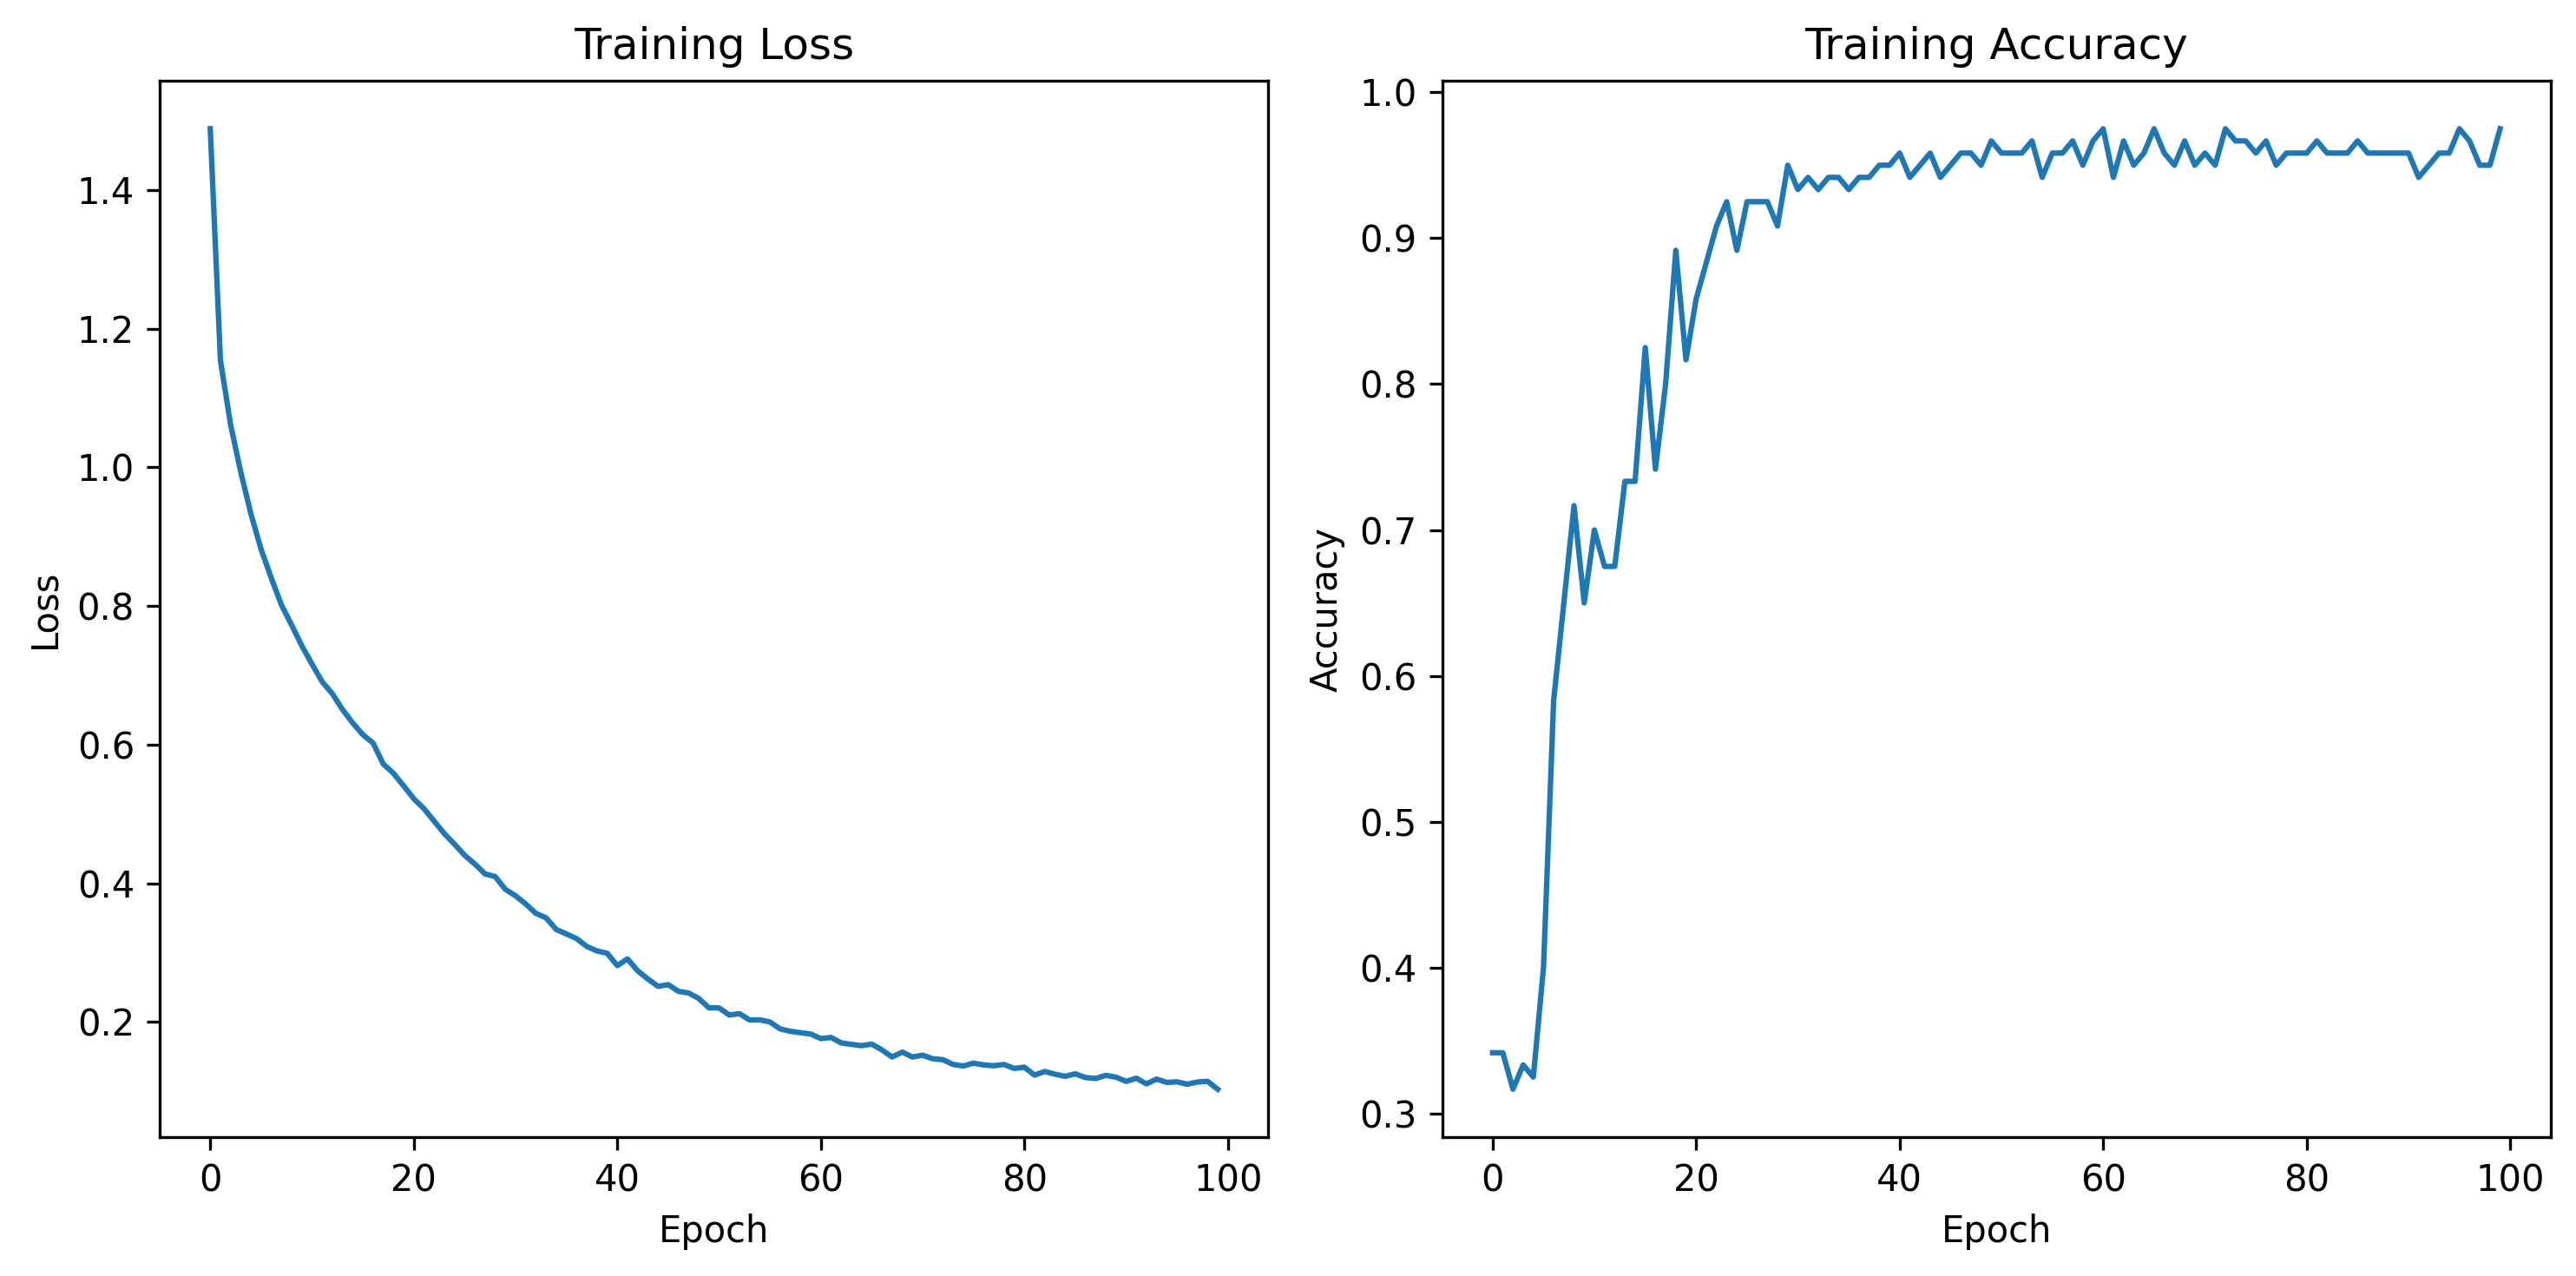

In [9]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 5), dpi=300)


plt.subplot(1, 2, 1)
plt.plot(fit.history["loss"])
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.title("Training Loss")

plt.subplot(1, 2, 2)
plt.plot(fit.history["accuracy"])
plt.xlabel("Epoch")
plt.ylabel("Accuracy")
plt.title("Training Accuracy")


plt.tight_layout()